**BASE PARA ANÁLISE**

https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv

In [ ]:
# Bibliotecas para manipulação dos dados
import pandas as pd
import numpy as np


In [ ]:
# Bibliotecas para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
titanic = pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv')

In [ ]:
## S = Southampton Inglaterra
## Q = Queenstown - Irlanda
## C = Cherbourg-Octeville - França

In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Limpeza dos dados. Dropando a coluna PassengerId.**

In [ ]:
titanic.drop("PassengerId",axis=1,inplace=True)


In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Mostrando apenas tripulantes da cidade de S = Southampton Inglaterra
titanic[titanic['Embarked'] =='S']['Name']

0                           Braund, Mr. Owen Harris
2                            Heikkinen, Miss. Laina
3      Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                          Allen, Mr. William Henry
6                           McCarthy, Mr. Timothy J
                           ...                     
883                   Banfield, Mr. Frederick James
884                          Sutehall, Mr. Henry Jr
886                           Montvila, Rev. Juozas
887                    Graham, Miss. Margaret Edith
888        Johnston, Miss. Catherine Helen "Carrie"
Name: Name, Length: 644, dtype: object

**Pesquisando pela coluna Survived e contando o máximo de linhas**

In [ ]:
titanic['Survived'] ==titanic['Survived'].max()

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

**Média de idade dos sobreviventes e mortos**

In [ ]:
titanic.groupby('Age').mean()

,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,
0.42,1.0,3.0,0.0,1.0,8.5167
0.67,1.0,2.0,1.0,1.0,14.5000
0.75,1.0,3.0,2.0,1.0,19.2583
0.83,1.0,2.0,0.5,1.5,23.8750
0.92,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...
70.00,0.0,1.5,0.5,0.5,40.7500
70.50,0.0,3.0,0.0,0.0,7.7500
71.00,0.0,1.0,0.0,0.0,42.0792


**Histograma da idade dos tripulantes**

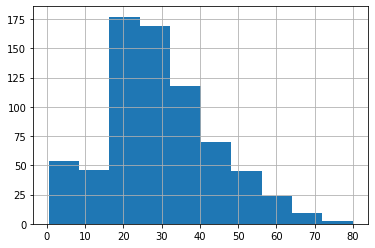

In [ ]:
titanic['Age'].hist()


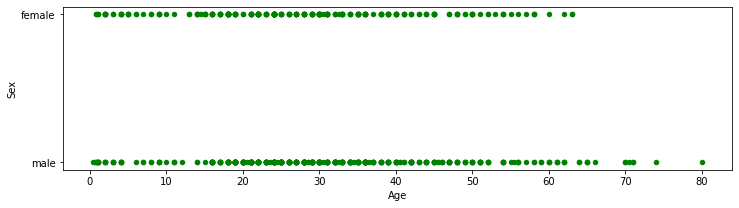

In [ ]:
titanic.plot.scatter(x='Age', y='Sex', c='green', figsize=(12,3))

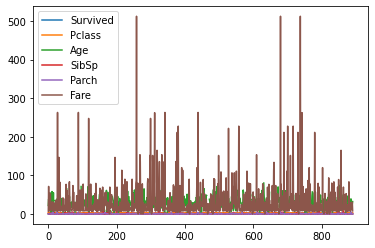

In [ ]:
titanic.plot()

**Total de mortos e vivos, 0 = mortos e 1 = vivo**

In [ ]:
titanic['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
for coluna in titanic:
  grafico = px.histogram(titanic, x=coluna, color="Survived")
  grafico.show()

**Mapeando mortos e vivos em um dicionário e salvando na variável surv**

In [ ]:
surv = {0:'Died', 1:'Alive'}
#Died
#Alive

**Substuindo o Survived pelo dicionário criado com os atributos criados, utilizando o método map**

In [ ]:
titanic['Survived'] = titanic['Survived'].map(surv)

In [ ]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,Alive,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,Alive,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
titanic['Survived'].value_counts()

Died     549
Alive    342
Name: Survived, dtype: int64

**Usando o Seaborn para criar um countplot de mortos e sobreviventes, baseado na nova coluna Survived, com a tonalidade baseada na coluna Embarked**

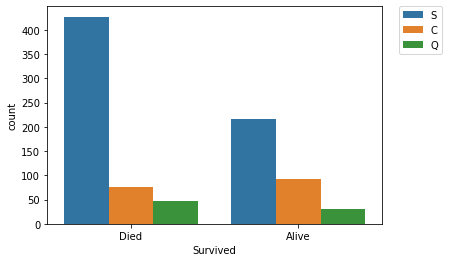

In [ ]:
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) - Defino a legenda do lado 
sns.countplot(x='Survived', data=titanic, hue='Embarked')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Criando um plot para cada cidade de embarcação, agrupando por sexo e contando por cidade**

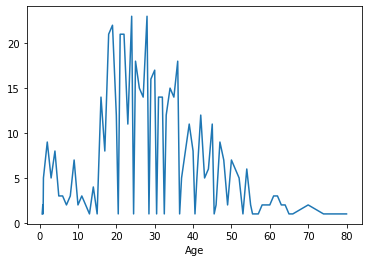

In [ ]:
titanic[titanic['Embarked'] == 'S'].groupby('Age').count()['Sex'].plot()

##df[df['Reason'] =='Traffic'].groupby('Sex').count()['twp'].plot()

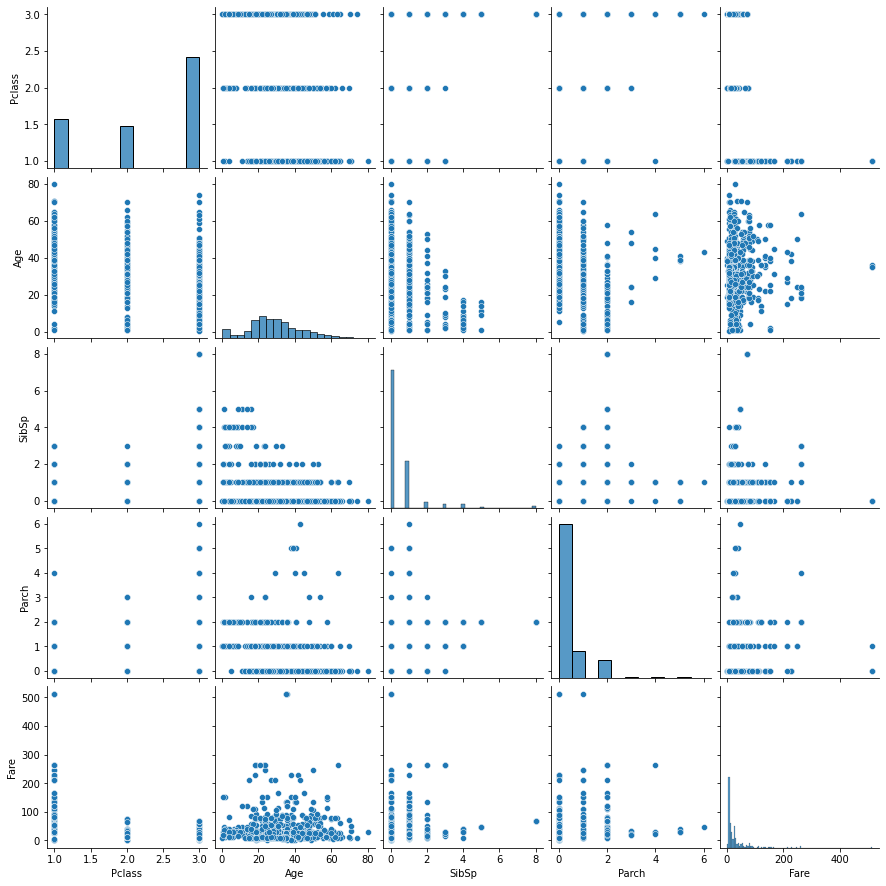

In [ ]:
sns.pairplot(titanic)

**Plotando com o heatmap as informações nulas**

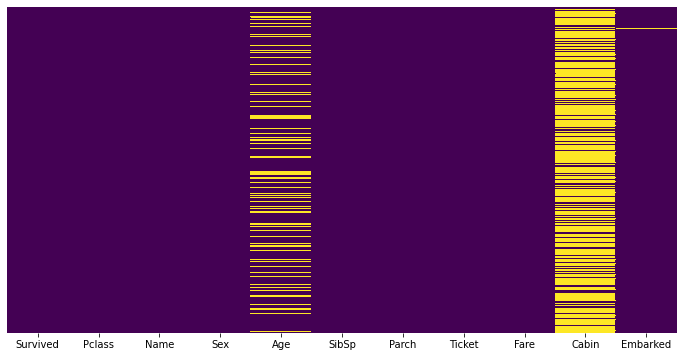

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Análise exploratória dos dados**

**Plotando um count de mortos e sobreviventes**

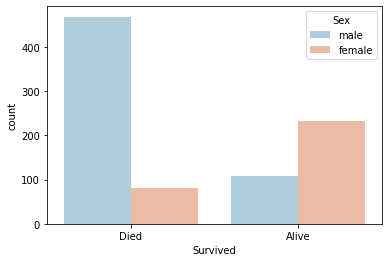

In [ ]:
# palette='RdBu_r' - azul para masculino e rosa para feminino
sns.countplot(x='Survived', data=titanic, hue='Sex', palette='RdBu_r')

**Distribuição de mortos e sobreviventes entre as classes**

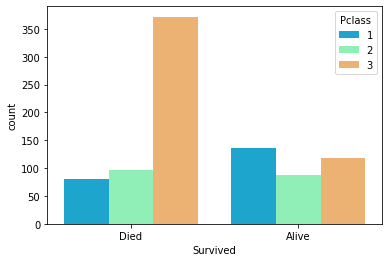

In [ ]:
sns.countplot(x='Survived', data=titanic, hue='Pclass', palette='rainbow')

**Distribuição das pessoas que acompanhavam**

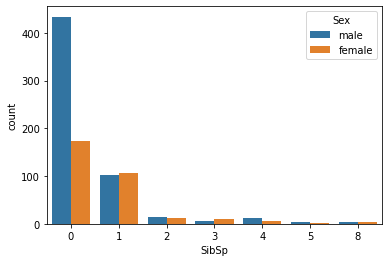

In [ ]:
sns.countplot(x='SibSp', data=titanic, hue='Sex')

**Pegando quando o número de acompanhante for igual a zero e pegando a idade usando o histograma.**

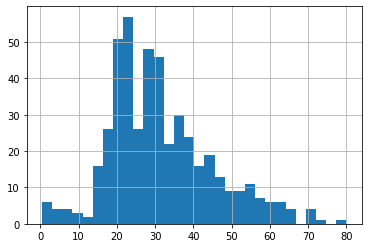

In [ ]:
titanic[titanic['SibSp'] ==0]['Age'].hist(bins=30)

**Analisando o ticket médio**

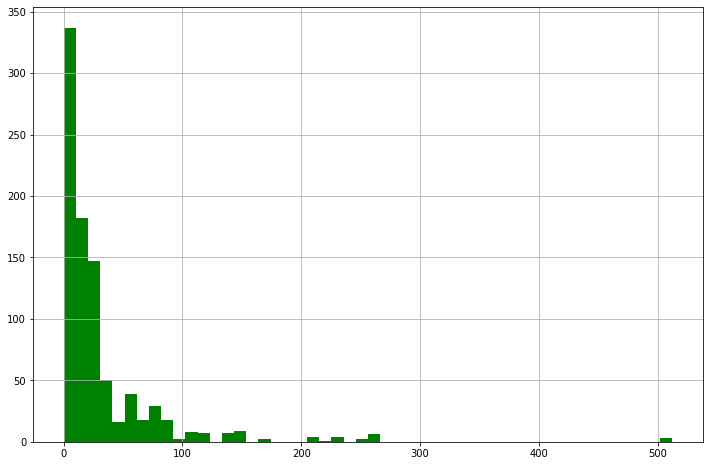

In [ ]:
titanic['Fare'].hist(color='green', bins=50, figsize=(12,8))

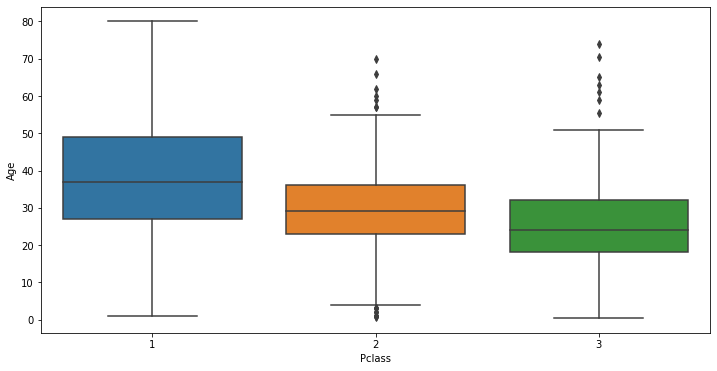

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=titanic)

**Tratando os dados faltantes da idade, preenchendo com a média da classe**

In [ ]:
def inputar_idade(cols):
  idade = cols[0]
  Classe = cols[1]
  if pd.isnull(idade):
    if Classe == 1:
         return 37
    elif Classe == 2:
          return 29
    else:
          return 24
  else:
          return idade


**Aplicando a função criada**

In [ ]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(inputar_idade, axis=1)

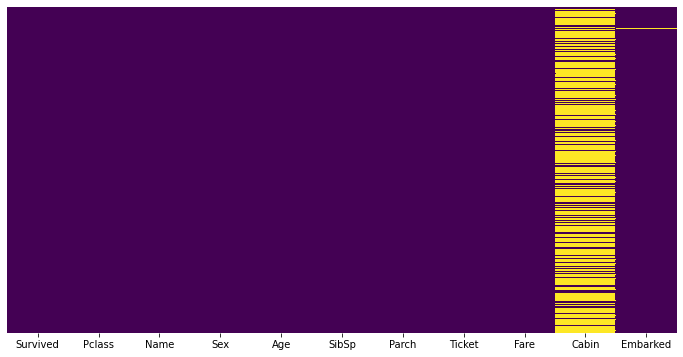

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Dropando a coluna Cabin, pois está com muita informação nula**

In [ ]:
del titanic['Cabin']

##titanic.drop('Cabin', inplace=True)

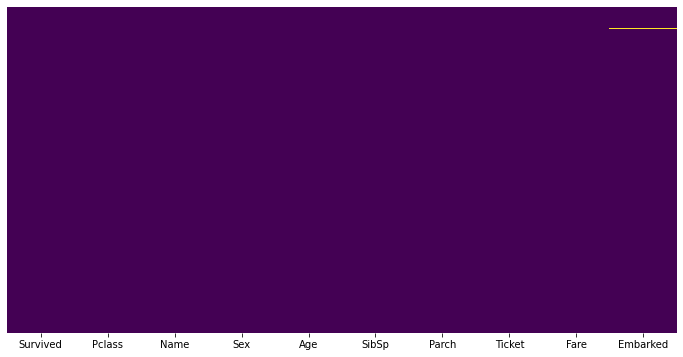

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Dropando a informação nula da coluna Embarked. Utilizando o método dropna, esse método excluir qualquer linha onde a informação seja falsa**

In [ ]:
titanic.dropna(inplace=True)

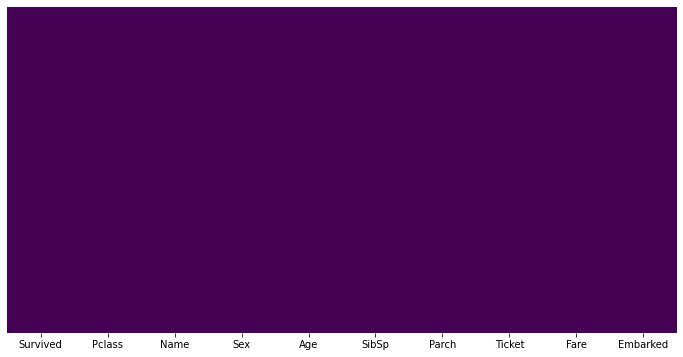

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Tratando os dados categóricos, o meu modelo trabalha com números e não com String. Para esse caso uso a função get_dummies**

**Tratando dados categóricos de sexo**

In [ ]:
## Método drop_first exclui a primeia linha e evita multicolinearidade
sex = pd.get_dummies(titanic['Sex'], drop_first=True)

**Tratando dados categóricos de embarque**

In [ ]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,Alive,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,Alive,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,Alive,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Dropando as colunas que serão irrelevantes na construção do modelo**

In [ ]:
## Passo uma lista de colunas que quero dropar do DataFrame
titanic.drop(['Sex', 'Name','Parch', 'Ticket'], axis=1, inplace=True)

**Próximo passos é colocar os tratamentos realizados com a função get_dummies dentro do meu DataFrame para finalizar com a limpeza dos dados**

In [ ]:
## Método concat do pandas
## Concateno meu DataFrame com as limpezas de dados onde utilizei o get_dummies
## concateno as variáveis que gravei, titanic, sex e embark
## concateno no eixo 1 nas colunas
titanic = pd.concat([titanic, sex, embark], axis=1)

**Dropando a coluna Embarked**

In [ ]:
del titanic['Embarked']

In [ ]:
titanic.head()

,Survived,Pclass,Age,SibSp,Fare,male,Q,S
0,Died,3,22.0,1,7.2500,1,0,1
1,Alive,1,38.0,1,71.2833,0,0,0
2,Alive,3,26.0,0,7.9250,0,0,1
3,Alive,1,35.0,1,53.1000,0,0,1
4,Died,3,35.0,0,8.0500,1,0,1


**Calibrando o modelo utilizando regressão logística**

In [ ]:
# Biblioteca de Machine Learning
from sklearn.linear_model import LogisticRegression

**Quebrando o modelo em dados de treino e de teste**

In [ ]:
# Biblioteca de Machine Learning
from sklearn.model_selection import train_test_split

In [ ]:
# Meus objetos de treino e teste
# meu X será tudo diferente da coluna Survived, para isso uso a função drop e o eixo 1 da coluna
# Meu y será a coluna Survived, meu test_size será de 30%
x_train, x_teste, y_train, y_teste = train_test_split(titanic.drop('Survived', axis=1), titanic['Survived'], test_size=0.3)

**Instanciando a classe LogisticRegression**

In [ ]:
logmodel = LogisticRegression()

**Instância criada posso calibrar meu modelo**

**Regressão criada e já posso usar esse modelo para predição**

In [ ]:
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Criando um objeto prection usando a classe logmodel.predict. Passando a variável x_teste, quero que ele me prediza os inputs do x_teste. Ou seja, ele vai pegar os valores de x_teste e calcular os valores que o modelo diz que é verdade.**

In [ ]:
prection = logmodel.predict(x_teste)

**Validando com o metrics**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_teste, prection))

              precision    recall  f1-score   support

       Alive       0.77      0.68      0.72       106
        Died       0.80      0.86      0.83       161

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_teste, prection))

[[ 72  34]
 [ 22 139]]
